In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import os

In [2]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to(device)

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [34]:
def generate_image(prompt):
    with autocast("cuda"):
        output = pipe(prompt)
        return output["sample"][0]

def get_file_name(path, name, suffix=".png"):
    n = sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path)) / 2
    name = f"{name}{suffix}" if n == 0 else f"{name}_{n}{suffix}"
    return os.path.join(path, name)

def plot_image(image, prompt, path, name, save=True):
    image_file = get_file_name(path, name)
    plot_file = get_file_name(path, name + "_plot", ".pdf")
    plt.imshow(image)
    plt.axis("off")
    plt.title(prompt)
    plt.tight_layout()
    if save:
        image.save(image_file)
        plt.savefig(plot_file)
    plt.show()

In [35]:
prompts = ["A wise turtle", "A gecko"]

0it [00:00, ?it/s]

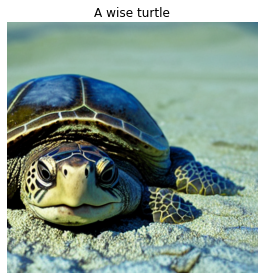

0it [00:00, ?it/s]

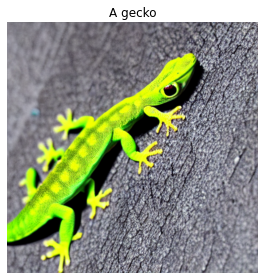

In [36]:
for prompt in prompts:
    image = generate_image(prompt)
    plot_image(image, prompt, "./outs/", "image")
